# Loading packages

In [1]:
import numpy as np
import pandas as pd
import statistics as stats
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import json_normalize


# Scraping Datasets from API

In [ ]:
url = "https://api-formula-1.p.rapidapi.com/rankings/fastestlaps"
querystring = {"race":"50"}
headers = {
	"X-RapidAPI-Key": "b004539dcfmsh0d1c733a10afce7p12205ajsnfb81c3a23eee",
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}
response = requests.request("GET", url, headers=headers, params=querystring)
print(response.text)

In [ ]:
url = "https://api-formula-1.p.rapidapi.com/seasons"
headers = {
	"X-RapidAPI-Key": "b004539dcfmsh0d1c733a10afce7p12205ajsnfb81c3a23eee",
	"X-RapidAPI-Host": "api-formula-1.p.rapidapi.com"
}
response = requests.request("GET", url, headers=headers)
print(response.text)

In [ ]:
years = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
driver_rank = []
url = "https://api-formula-1.p.rapidapi.com/rankings/drivers"

for year in years:
    querystring = {"season": str(year)}
    response = requests.request("GET", url, headers=headers, params=querystring)
    d = response.json()
    driver_rank.append(json_normalize(d['response']))
    
driver_rank_df = pd.concat(driver_rank)
driver_rank_df

In [ ]:
years = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
dataseasons = []
url = "https://api-formula-1.p.rapidapi.com/races"

for year in years:
    querystring = {"type":"race","season": str(year)}
    response = requests.request("GET", url, headers=headers, params=querystring)
    y = response.json()
    dataseasons.append(json_normalize(y['response']))
    
dataseasons_df = pd.concat(dataseasons)
dataseasons_df

In [ ]:
dataseasons_df['id'].unique()

In [ ]:
race_ids = [  43,   99,  176,  260,  323,  414,  505,  554,  596,  659,  764,
        785,  897,  960, 1065, 1128,   29,  120,  134,  232,  267,  358,
        512,  561,  638,  666,  778,  813,  904, 1002, 1072, 1135,    1,
        106,  183,  204,  274,  365,  442,  519,  575,  603,  673,  722,
        820,  848,  946, 1009, 1079, 1170,    8,   64,  141,  239,  281,
        400,  449,  526,  645,  680,  729,  827,  855,  911, 1016, 1058,
       1086, 1177,   36,   71,  148,  246,  316,  372,  456,  533,  582,
        610,  701,  736,  792,  890,  918,  967, 1023, 1093, 1142,   15,
         78,  155,  211,  288,  330,  407,  463,  540,  617,  687,  743,
        834,  883,  925,  974, 1030, 1100, 1149,   22,  113,  190,  218,
        295,  351,  379,  421,  470,  547,  568,  624,  708,  750,  799,
        862,  932,  981, 1037, 1121, 1184,   50,   85,  162,  253,  302,
        337,  386,  428,  477,  491,  589,  652,  694,  757,  806,  869,
        939,  988, 1044, 1107, 1156,   57,   92,  127,  169,  197,  225,
        309,  344,  393,  435,  484,  498,  631,  715,  771,  841,  876,
        953,  995, 1051, 1114, 1194, 1208, 1215, 1222, 1229, 1234, 1249,
       1255, 1269, 1273, 1278, 1283, 1288, 1293, 1298, 1303, 1308, 1313,
       1318, 1323, 1328, 1333, 1338, 1343, 1348, 1353, 1358, 1363, 1368,
       1373, 1378, 1383, 1425, 1463, 1476, 1488, 1493, 1498, 1503, 1508,
       1513, 1518, 1523, 1528, 1533, 1538, 1543, 1548, 1553, 1558, 1563,
       1568, 1573, 1578, 1583, 1588, 1593, 1598]
dataraces = []
url = "https://api-formula-1.p.rapidapi.com/rankings/races"

for race_id in race_ids:
    querystring = {"race": str(race_id)}
    response = requests.request("GET", url, headers=headers, params=querystring)
    r = response.json()
    dataraces.append(json_normalize(r['response']))

dataraces = pd.concat(dataraces)
dataraces

In [ ]:
dataseasons_df.rename(columns = {'id':'race.id'}, inplace = True) 

In [ ]:
# Left join
result_df = pd.merge(dataraces, dataseasons_df, on='race.id', how='left')
result_df

In [2]:
driver_rank_df.to_csv("driver_rank_df.csv", index= True)
dataseasons_df.to_csv("dataseasons_df.csv", index= True)
dataraces.to_csv("dataraces.csv", index= True)
result_df.to_csv("result_df.csv", index= True)


NameError: name 'driver_rank_df' is not defined

In [3]:
result_df = pd.read_csv('result_df.csv')

In [4]:
result_df

,Unnamed: 0,position,time,laps,grid,pits,gap,race.id,driver.id,driver.name,driver.abbr,driver.number,driver.image,team.id,team.name,team.logo,season,type,distance,timezone,date,weather,status,competition.id,competition.name,competition.location.country,competition.location.city,circuit.id,circuit.name,circuit.image,laps.current,laps.total,fastest_lap.driver.id,fastest_lap.time
0,0,1,1:34:09.565,58,2,2.0,NaN,43,3.0,Jenson Button,BUT,22.0,https://media.api-sports.io/formula-1/drivers/...,2,McLaren Racing,https://media-3.api-sports.io/formula-1/teams/...,2012,Race,307.574 Kms,utc,2012-03-18T09:00:00+00:00,Sunny,Completed,1,Australia Grand Prix,Australia,Melbourne,1,Albert Park Circuit,https://media.api-sports.io/formula-1/circuits...,58/58,58,3.0,1:29.187
1,1,2,+2.100,58,6,2.0,NaN,43,19.0,Sebastian Vettel,VET,5.0,https://media-3.api-sports.io/formula-1/driver...,1,Red Bull Racing,https://media-3.api-sports.io/formula-1/teams/...,2012,Race,307.574 Kms,utc,2012-03-18T09:00:00+00:00,Sunny,Completed,1,Australia Grand Prix,Australia,Melbourne,1,Albert Park Circuit,https://media.api-sports.io/formula-1/circuits...,58/58,58,3.0,1:29.187
2,2,3,+4.000,58,1,2.0,NaN,43,20.0,Lewis Hamilton,HAM,44.0,https://media.api-sports.io/formula-1/drivers/...,2,McLaren Racing,https://media-3.api-sports.io/formula-1/teams/...,2012,Race,307.574 Kms,utc,2012-03-18T09:00:00+00:00,Sunny,Completed,1,Australia Grand Prix,Australia,Melbourne,1,Albert Park Circuit,https://media.api-sports.io/formula-1/circuits...,58/58,58,3.0,1:29.187
3,3,4,+4.500,58,5,2.0,NaN,43,38.0,Mark Webber,WEB,2.0,https://media-3.api-sports.io/formula-1/driver...,1,Red Bull Racing,https://media-3.api-sports.io/formula-1/teams/...,2012,Race,307.574 Kms,utc,2012-03-18T09:00:00+00:00,Sunny,Completed,1,Australia Grand Prix,Australia,Melbourne,1,Albert Park Circuit,https://media.api-sports.io/formula-1/circuits...,58/58,58,3.0,1:29.187
4,4,5,+21.500,58,12,2.0,NaN,43,4.0,Fernando Alonso,ALO,14.0,https://media-3.api-sports.io/formula-1/driver...,3,Scuderia Ferrari,https://media.api-sports.io/formula-1/teams/3.png,2012,Race,307.574 Kms,utc,2012-03-18T09:00:00+00:00,Sunny,Completed,1,Australia Grand Prix,Australia,Melbourne,1,Albert Park Circuit,https://media.api-sports.io/formula-1/circuits...,58/58,58,3.0,1:29.187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,4316,15,+1 lap,58,18,2.0,NaN,1598,5.0,Valtteri Bottas,BOT,77.0,https://media.api-sports.io/formula-1/drivers/...,18,Alfa Romeo,https://media-3.api-sports.io/formula-1/teams/...,2022,Race,307.6 Kms,utc,2022-11-20T13:00:00+00:00,NaN,Completed,23,Abu Dhabi Grand Prix,Abu Dhabi,"Yas Marina, Abou Dabi",23,Yas Marina Circuit,https://media.api-sports.io/formula-1/circuits...,NaN,55,49.0,1:28.391
4317,4317,13,+1 lap,58,19,2.0,NaN,1598,50.0,Alexander Albon,ALB,23.0,https://media.api-sports.io/formula-1/drivers/...,12,Williams F1 Team,https://media.api-sports.io/formula-1/teams/12...,2022,Race,307.6 Kms,utc,2022-11-20T13:00:00+00:00,NaN,Completed,23,Abu Dhabi Grand Prix,Abu Dhabi,"Yas Marina, Abou Dabi",23,Yas Marina Circuit,https://media.api-sports.io/formula-1/circuits...,NaN,55,49.0,1:28.391
4318,4318,19,DNF,58,20,2.0,NaN,1598,61.0,Nicholas Latifi,LAT,6.0,https://media.api-sports.io/formula-1/drivers/...,12,Williams F1 Team,https://media.api-sports.io/formula-1/teams/12...,2022,Race,307.6 Kms,utc,2022-11-20T13:00:00+00:00,NaN,Completed,23,Abu Dhabi Grand Prix,Abu Dhabi,"Yas Marina, Abou Dabi",23,Yas Marina Circuit,https://media.api-sports.io/formula-1/circuits...,NaN,55,49.0,1:28.391
4319,4319,18,DNF,56,5,1.0,NaN,1598,20.0,Lewis Hamilton,HAM,44.0,https://media-3.api-sports.io/formula-1/driver...,5,Mercedes-AMG Petronas,https://media.api-sports.io/formula-1/teams/5.png,2022,Race,307.6 Kms,utc,2022-11-20T13:00:00+00:00,NaN,Completed,23,Abu Dhabi Grand Prix,Abu Dhabi,"Yas Marina, Abou Dabi",23,Yas Marina Circuit,https://media.api-sports.io/formula-1/cir

### Checking for null values

In [5]:
nulls_df = pd.DataFrame(round(result_df.isna().sum()/len(result_df),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Unnamed: 0,0.00
1,position,0.00
2,time,0.90
3,laps,0.00
4,grid,0.05
5,pits,1.92
6,gap,100.00
7,race.id,0.00
8,driver.id,0.07
9,driver.name,0.07


In [6]:
columns_drop = pd.DataFrame(nulls_df[nulls_df['percent_nulls']>0]['header_name'])  # dummy case with 3
columns_drop

,header_name
2,time
4,grid
5,pits
6,gap
8,driver.id
9,driver.name
10,driver.abbr
11,driver.number
12,driver.image
21,weather


### Dropping redundant columns

In [7]:
result_df.drop(['date','fastest_lap.driver.id','Unnamed: 0','team.id','type','competition.id','circuit.id','competition.name','driver.number','gap','driver.abbr','driver.image','circuit.image','laps.current','timezone','team.logo'], axis=1, inplace=True)

In [8]:
result_df.tail(60)

,position,time,laps,grid,pits,race.id,driver.id,driver.name,team.name,season,distance,weather,status,competition.location.country,competition.location.city,circuit.name,laps.total,fastest_lap.time
4261,1,1:38:36.729,71,1,1.0,1588,25.0,Max Verstappen,Red Bull Racing,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153
4262,2,+15.186,71,3,1.0,1588,20.0,Lewis Hamilton,Mercedes-AMG Petronas,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153
4263,3,+18.097,71,4,1.0,1588,10.0,Sergio Perez,Red Bull Racing,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153
4264,4,+49.431,71,2,2.0,1588,51.0,George Russell,Mercedes-AMG Petronas,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153
4265,5,+58.123,71,5,1.0,1588,24.0,Carlos Sainz Jr,Scuderia Ferrari,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153
4266,6,+1:08.774,71,7,1.0,1588,34.0,Charles Leclerc,Scuderia Ferrari,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153
4267,7,+1 lap,70,11,1.0,1588,14.0,Daniel Ricciardo,McLaren Racing,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153
4268,8,+1 lap,70,10,1.0,1588,28.0,Esteban Ocon,Alpine F1 Team,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153
4269,9,+1 lap,70,8,1.0,1588,49.0,Lando Norris,McLaren Racing,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153
4270,10,+1 lap,70,6,1.0,1588,5.0,Valtteri Bottas,Alfa Romeo,2022,307.6 Kms,NaN,Completed,Mexico,Mexico,Autódromo Hermanos Rodríguez,71,1:20.153


In [9]:
result_df.shape

(4321, 18)

### Dealing with NaN values

In [10]:
result_df.isna().sum()

position                           0
time                              39
laps                               0
grid                               2
pits                              83
race.id                            0
driver.id                          3
driver.name                        3
team.name                          0
season                             0
distance                           0
weather                         1360
status                             0
competition.location.country       0
competition.location.city         20
circuit.name                       0
laps.total                         0
fastest_lap.time                  20
dtype: int64

##### TIME

In [11]:
value_counts = result_df["time"].value_counts(sort=True)
print(value_counts)

1 Lap        773
DNF          463
+1 Lap       224
2 Lap        118
Accident      98
            ... 
+1:01.109      1
+1:00.151      1
+59.445        1
+45.394        1
+1:29.371      1
Name: time, Length: 2116, dtype: int64


In [12]:
result_df['time'] = result_df['time'].fillna('Other')

In [13]:
missing_values = result_df[result_df["time"].isna()]
print(missing_values)

Empty DataFrame
Columns: [position, time, laps, grid, pits, race.id, driver.id, driver.name, team.name, season, distance, weather, status, competition.location.country, competition.location.city, circuit.name, laps.total, fastest_lap.time]
Index: []


##### PITS

In [14]:
result_df['pits'].unique()
result_df['pits'].mode()
mode_pits= result_df["pits"].mode()
result_df['pits'] = result_df['pits'].fillna(2.0)

##### WEATHER

In [15]:
result_df['weather'].unique()
result_df['weather'].value_counts()
mode_weather = result_df['weather'].mode()
print(mode_weather)
result_df['weather'] = result_df['weather'].fillna('Clear')

0    Clear
Name: weather, dtype: object


In [16]:
result_df['weather'] = result_df['weather'].fillna('Clear')

In [17]:
result_df['weather'].isna().sum()

0

In [18]:
#missing_values_df = result_df[result_df["fastest_lap.time"].isna()]
#missing_values_df


##### competition.location.city

In [21]:
result_df['competition.location.city'] = result_df['competition.location.city'].fillna('Nurburg')

### Dropping empty rows

In [22]:
drop_list = ['grid','driver.id','driver.name','fastest_lap.time']

for col in drop_list:
    result_df=result_df.dropna(subset=[col])


##### POSITION

In [23]:
result_df['position'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,  0,
       17, 18, 19, 20, 21, 22, 23])

In [24]:
def win_loss(item):
    if item == 1:
        return "won"
    elif item > 1:
        return 'lost'
    else: 
        return item

In [25]:
def podium_position(item):
    if item < 4:
        return "podium achieved"
    elif item > 3:
        return 'no podium position'
    else: 
        return item

In [26]:
result_df['podium_position'] = result_df['position'].apply(podium_position)
result_df['win_loss'] = result_df['position'].apply(win_loss)

In [27]:
result_df.head()

,position,time,laps,grid,pits,race.id,driver.id,driver.name,team.name,season,distance,weather,status,competition.location.country,competition.location.city,circuit.name,laps.total,fastest_lap.time,podium_position,win_loss
0,1,1:34:09.565,58,2,2.0,43,3.0,Jenson Button,McLaren Racing,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,podium achieved,won
1,2,+2.100,58,6,2.0,43,19.0,Sebastian Vettel,Red Bull Racing,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,podium achieved,lost
2,3,+4.000,58,1,2.0,43,20.0,Lewis Hamilton,McLaren Racing,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,podium achieved,lost
3,4,+4.500,58,5,2.0,43,38.0,Mark Webber,Red Bull Racing,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,no podium position,lost
4,5,+21.500,58,12,2.0,43,4.0,Fernando Alonso,Scuderia Ferrari,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,no podium position,lost


In [28]:
result_df.drop(['position'], axis=1, inplace=True)

### changing columns to boolean 

In [29]:
cols = ["podium_position"]
result_df[cols] = result_df[cols].replace({'no podium position': 0, 'podium achieved':1})

In [30]:
cols = ["win_loss"]
result_df[cols] = result_df[cols].replace({'won': 1, 'lost':0})

### calculating lap time

In [31]:
result_df['fastest_lap.time'].isna().sum()

0

In [32]:
result_df['minutes'] = result_df['fastest_lap.time'].str.split(':').str[0]
result_df['seconds'] = result_df['fastest_lap.time'].str.split(':').str[1]
result_df['seconds'] = result_df['fastest_lap.time'].str.split(':').str[1]
result_df['calculated_secs'] = result_df['seconds'].str.split('.').str[0]
result_df['milisecs'] = result_df['seconds'].str.split('.').str[1]

In [33]:
result_df['milisecs'] = pd.to_numeric(result_df['milisecs'], errors='coerce')

In [34]:
result_df['milisecs_calc'] = result_df['milisecs']/1000

In [35]:
result_df.head()

,time,laps,grid,pits,race.id,driver.id,driver.name,team.name,season,distance,weather,status,competition.location.country,competition.location.city,circuit.name,laps.total,fastest_lap.time,podium_position,win_loss,minutes,seconds,calculated_secs,milisecs,milisecs_calc
0,1:34:09.565,58,2,2.0,43,3.0,Jenson Button,McLaren Racing,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,1,1,1,29.187,29,187.0,0.187
1,+2.100,58,6,2.0,43,19.0,Sebastian Vettel,Red Bull Racing,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,1,0,1,29.187,29,187.0,0.187
2,+4.000,58,1,2.0,43,20.0,Lewis Hamilton,McLaren Racing,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,1,0,1,29.187,29,187.0,0.187
3,+4.500,58,5,2.0,43,38.0,Mark Webber,Red Bull Racing,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,0,0,1,29.187,29,187.0,0.187
4,+21.500,58,12,2.0,43,4.0,Fernando Alonso,Scuderia Ferrari,2012,307.574 Kms,Sunny,Completed,Australia,Melbourne,Albert Park Circuit,58,1:29.187,0,0,1,29.187,29,187.0,0.187


In [36]:

result_df['minutes'] = pd.to_numeric(result_df['minutes'], errors='coerce')
result_df['calculated_secs'] = pd.to_numeric(result_df['seconds'], errors='coerce')
result_df['milisecs_calc'] = pd.to_numeric(result_df['milisecs_calc'], errors='coerce')
#result_df['distance'] = pd.to_numeric(result_df['distance'], errors='coerce')


In [37]:
#result_df['miliseconds_calculated']=result_df['miliseconds']/1000
result_df['fastest_lap'] = 60 + result_df['calculated_secs'] + result_df['milisecs_calc']


In [38]:
result_df.drop(['competition.location.country','fastest_lap.time','time','minutes','calculated_secs','seconds','milisecs','milisecs_calc'], axis=1, inplace=True)

In [39]:
result_df.head()

,laps,grid,pits,race.id,driver.id,driver.name,team.name,season,distance,weather,status,competition.location.city,circuit.name,laps.total,podium_position,win_loss,fastest_lap
0,58,2,2.0,43,3.0,Jenson Button,McLaren Racing,2012,307.574 Kms,Sunny,Completed,Melbourne,Albert Park Circuit,58,1,1,89.374
1,58,6,2.0,43,19.0,Sebastian Vettel,Red Bull Racing,2012,307.574 Kms,Sunny,Completed,Melbourne,Albert Park Circuit,58,1,0,89.374
2,58,1,2.0,43,20.0,Lewis Hamilton,McLaren Racing,2012,307.574 Kms,Sunny,Completed,Melbourne,Albert Park Circuit,58,1,0,89.374
3,58,5,2.0,43,38.0,Mark Webber,Red Bull Racing,2012,307.574 Kms,Sunny,Completed,Melbourne,Albert Park Circuit,58,0,0,89.374
4,58,12,2.0,43,4.0,Fernando Alonso,Scuderia Ferrari,2012,307.574 Kms,Sunny,Completed,Melbourne,Albert Park Circuit,58,0,0,89.374


In [40]:
result_df.dtypes

laps                           int64
grid                          object
pits                         float64
race.id                        int64
driver.id                    float64
driver.name                   object
team.name                     object
season                         int64
distance                      object
weather                       object
status                        object
competition.location.city     object
circuit.name                  object
laps.total                     int64
podium_position                int64
win_loss                       int64
fastest_lap                  float64
dtype: object

##### Cleaning up Distance

In [42]:
def remove_kms(df,col_name):
    df[col_name]=df[col_name].apply(lambda x : x.replace("Kms"," "))
    return df

In [43]:
remove_kms(result_df,'distance')

,laps,grid,pits,race.id,driver.id,driver.name,team.name,season,distance,weather,status,competition.location.city,circuit.name,laps.total,podium_position,win_loss,fastest_lap
0,58,2,2.0,43,3.0,Jenson Button,McLaren Racing,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,1,1,89.374
1,58,6,2.0,43,19.0,Sebastian Vettel,Red Bull Racing,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,1,0,89.374
2,58,1,2.0,43,20.0,Lewis Hamilton,McLaren Racing,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,1,0,89.374
3,58,5,2.0,43,38.0,Mark Webber,Red Bull Racing,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,0,0,89.374
4,58,12,2.0,43,4.0,Fernando Alonso,Scuderia Ferrari,2012,307.574,Sunny,Completed,Melbourne,Albert Park Circuit,58,0,0,89.374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4316,58,18,2.0,1598,5.0,Valtteri Bottas,Alfa Romeo,2022,307.6,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit,55,0,0,88.782
4317,58,19,2.0,1598,50.0,Alexander Albon,Williams F1 Team,2022,307.6,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit,55,0,0,88.782
4318,58,20,2.0,1598,61.0,Nicholas Latifi,Williams F1 Team,2022,307.6,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit,55,0,0,88.782
4319,56,5,1.0,1598,20.0,Lewis Hamilton,Mercedes-AMG Petronas,2022,307.6,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit,55,0,0,88.782


### Cleaning up weather data

In [44]:
result_df['weather'].unique()

array(['Sunny', 'Clear', 'Cloudy', 'Rain', 'Storm', 'Pos/Rain',
       'P/Cloudy', 'P Cloudy', 'P. Cloudy', 'Mostly Cloudy',
       'Partly Cloudy', 'Light Rain', 'P.Cloudy', 'Partial Cloudy',
       'Haze'], dtype=object)

In [45]:
def weather_cleaning(item):
    if item in ['P/Cloudy', 'P Cloudy', 'P. Cloudy','P.Cloudy', 'Partial Cloudy','Partly Cloudy']:
        return "Partly Cloudy"
    elif item in ['Pos/Rain','Light Rain']:
        return 'Rainy'
    else: 
        return item

In [46]:
def weather_cleaning_2(item):
    if item in ['Mostly Cloudy']:
        return "Cloudy"
    elif item in ['Rainy']:
        return 'Rain'
    else: 
        return item

In [47]:
result_df['weather'] = result_df['weather'].apply(weather_cleaning)
result_df['weather'] = result_df['weather'].apply(weather_cleaning_2)

### Cleaning up grid data

In [48]:
result_df['grid'].unique()

array(['2', '6', '1', '5', '12', '13', '17', '22', '10', '15', '11', '7',
       '8', '20', '21', '14', '16', '18', '19', '4', '3', '9', 'DNQ',
       '23', '24', 'R'], dtype=object)

In [49]:
def grid_cleaning(item):
    if item in ['DNQ','R']:
        return "Other"
    else: 
        return item

In [50]:
result_df['grid'] = result_df['grid'].apply(grid_cleaning)

In [51]:
result_df['grid'].unique()

array(['2', '6', '1', '5', '12', '13', '17', '22', '10', '15', '11', '7',
       '8', '20', '21', '14', '16', '18', '19', '4', '3', '9', 'Other',
       '23', '24'], dtype=object)

In [59]:
result_df['fastest_lap'].unique()
result_df['fastest_lap'].mean()
result_df['fastest_lap'] = result_df['fastest_lap'].fillna(result_df['fastest_lap'].mean())

In [60]:
result_df.isna().sum()

laps                         0
grid                         0
pits                         0
race.id                      0
driver.id                    0
driver.name                  0
team.name                    0
season                       0
distance                     0
weather                      0
status                       0
competition.location.city    0
circuit.name                 0
laps.total                   0
podium_position              0
win_loss                     0
fastest_lap                  0
dtype: int64

### Saving cleaned data

In [61]:
result_df.to_csv("result_df_clean.csv", index= True)


### Numerical / Categorical Split

In [62]:
numerical = result_df.select_dtypes(include = np.number)
numerical

,laps,pits,race.id,driver.id,season,laps.total,podium_position,win_loss,fastest_lap
0,58,2.0,43,3.0,2012,58,1,1,89.374
1,58,2.0,43,19.0,2012,58,1,0,89.374
2,58,2.0,43,20.0,2012,58,1,0,89.374
3,58,2.0,43,38.0,2012,58,0,0,89.374
4,58,2.0,43,4.0,2012,58,0,0,89.374
...,...,...,...,...,...,...,...,...,...
4316,58,2.0,1598,5.0,2022,55,0,0,88.782
4317,58,2.0,1598,50.0,2022,55,0,0,88.782
4318,58,2.0,1598,61.0,2022,55,0,0,88.782
4319,56,1.0,1598,20.0,2022,55,0,0,88.782


In [63]:
categorical = result_df.select_dtypes(include = object)
categorical

,grid,driver.name,team.name,distance,weather,status,competition.location.city,circuit.name
0,2,Jenson Button,McLaren Racing,307.574,Sunny,Completed,Melbourne,Albert Park Circuit
1,6,Sebastian Vettel,Red Bull Racing,307.574,Sunny,Completed,Melbourne,Albert Park Circuit
2,1,Lewis Hamilton,McLaren Racing,307.574,Sunny,Completed,Melbourne,Albert Park Circuit
3,5,Mark Webber,Red Bull Racing,307.574,Sunny,Completed,Melbourne,Albert Park Circuit
4,12,Fernando Alonso,Scuderia Ferrari,307.574,Sunny,Completed,Melbourne,Albert Park Circuit
...,...,...,...,...,...,...,...,...
4316,18,Valtteri Bottas,Alfa Romeo,307.6,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit
4317,19,Alexander Albon,Williams F1 Team,307.6,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit
4318,20,Nicholas Latifi,Williams F1 Team,307.6,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit
4319,5,Lewis Hamilton,Mercedes-AMG Petronas,307.6,Clear,Completed,"Yas Marina, Abou Dabi",Yas Marina Circuit


In [64]:
#result_df['grid'] = pd.to_numeric(result_df['grid'], errors='coerce')
result_df['distance'] = pd.to_numeric(result_df['distance'], errors='coerce')


### Exploratory Data Analysis

In [65]:
result_df.describe().T

,count,mean,std,min,25%,50%,75%,max
laps,4296.0,53.750000,17.840618,0.000,52.000,56.000000,66.000,87.000
pits,4296.0,1.930168,1.028245,0.000,1.000,2.000000,2.000,7.000
race.id,4296.0,788.541434,460.712700,1.000,407.000,771.000000,1177.000,1598.000
driver.id,4296.0,22.236965,17.567132,1.000,9.000,19.000000,31.000,88.000
season,4296.0,2017.136872,3.164615,2012.000,2014.000,2017.000000,2020.000,2022.000
distance,4296.0,305.332232,9.163010,260.286,306.198,307.574000,307.600,309.745
laps.total,4296.0,60.462058,8.728685,43.000,53.000,57.000000,70.000,78.000
podium_position,4296.0,0.269786,0.443900,0.000,0.000,0.000000,1.000,1.000
win_loss,4296.0,0.048417,0.214671,0.000,0.000,0.000000,0.000,1.000
fastest_lap,4296.0,89.432558,11.857868,66.238,78.958,89.432558,97.922,113.644


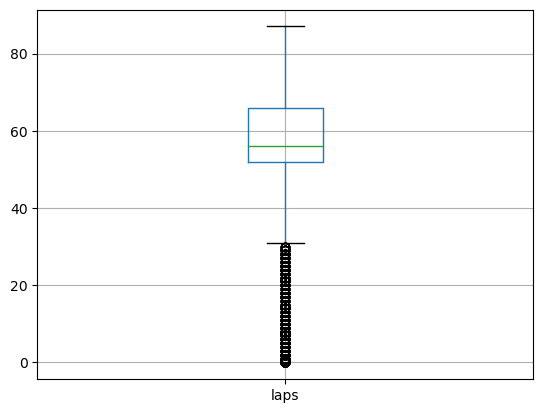

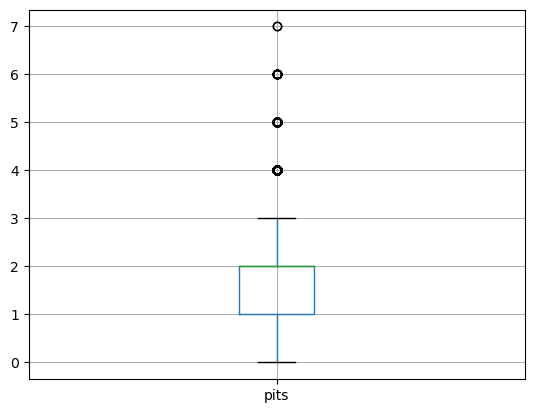

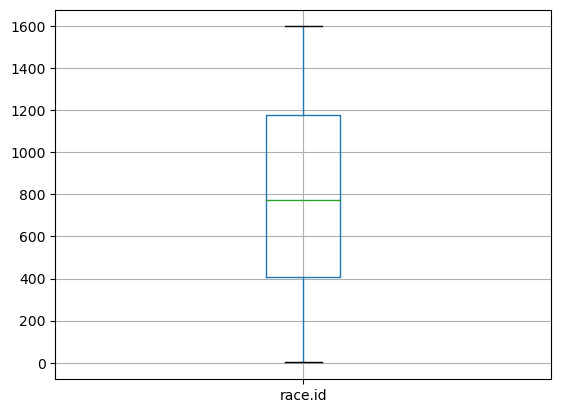

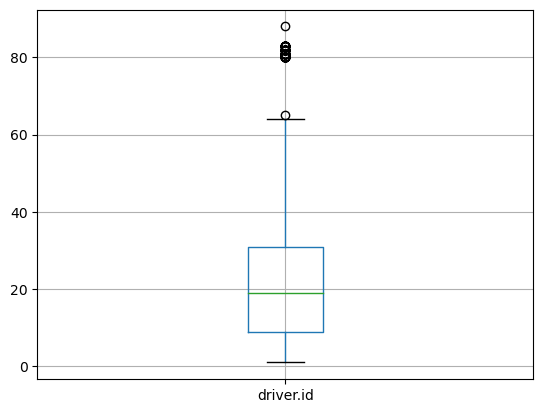

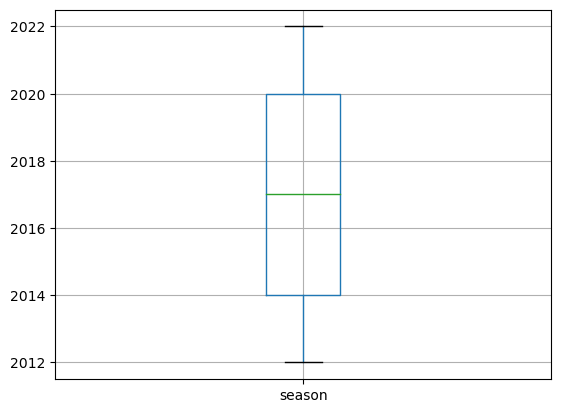

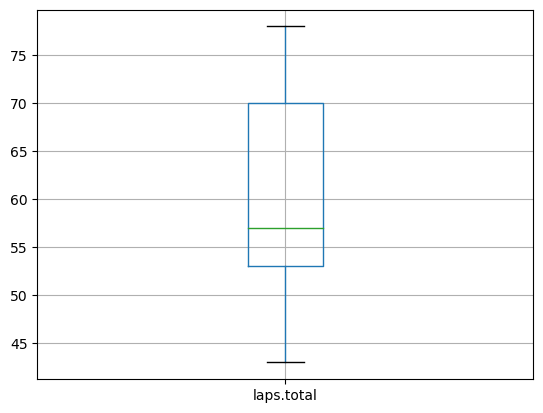

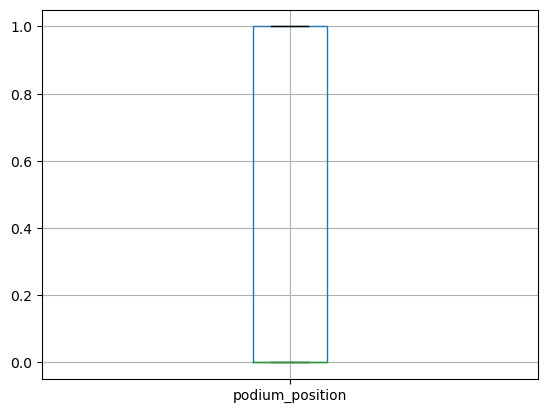

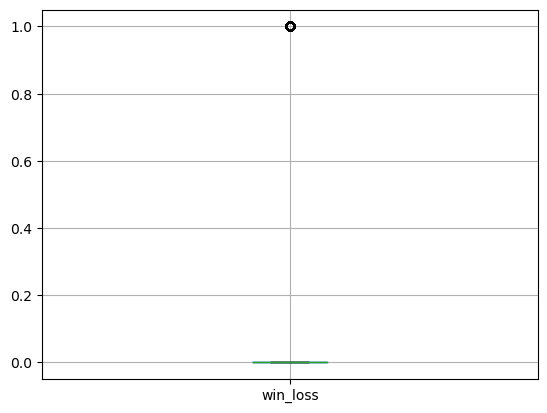

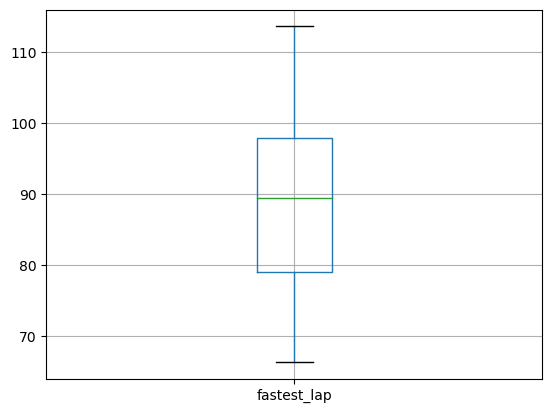

In [66]:
for col in numerical.columns:
    numerical.boxplot(column=col)
    plt.show()

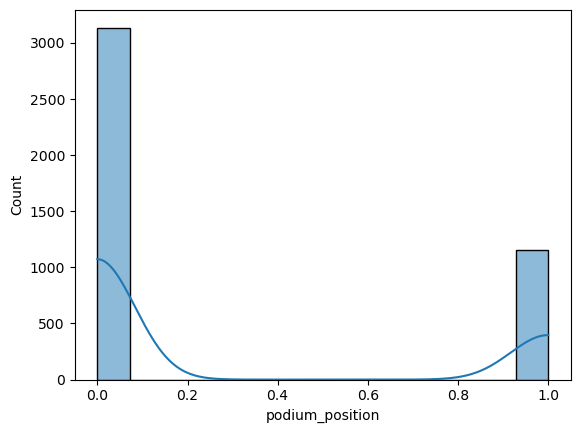

In [67]:
sns.histplot(result_df['podium_position'], kde = True)
plt.show()

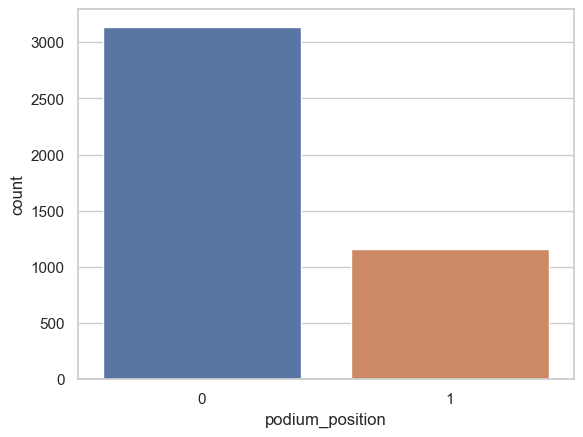

In [68]:
sns.set(style="whitegrid")
ax = sns.countplot(x='podium_position', data=result_df)
plt.show() 

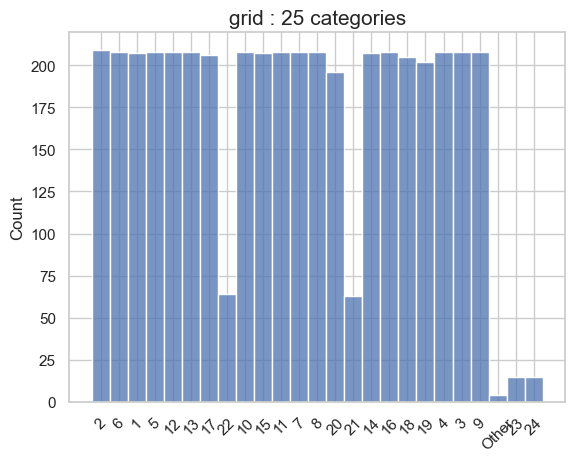

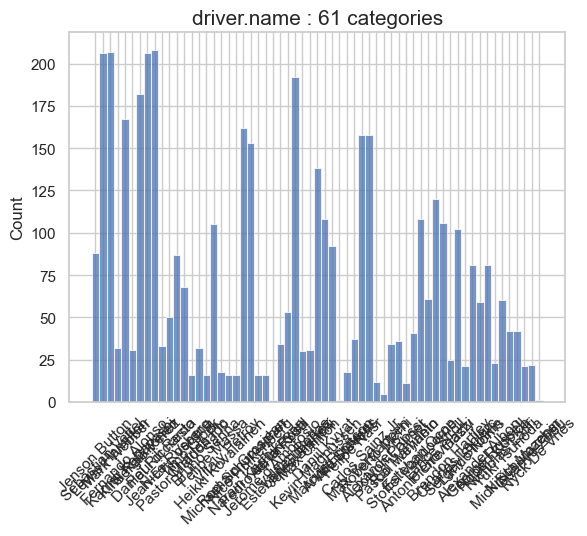

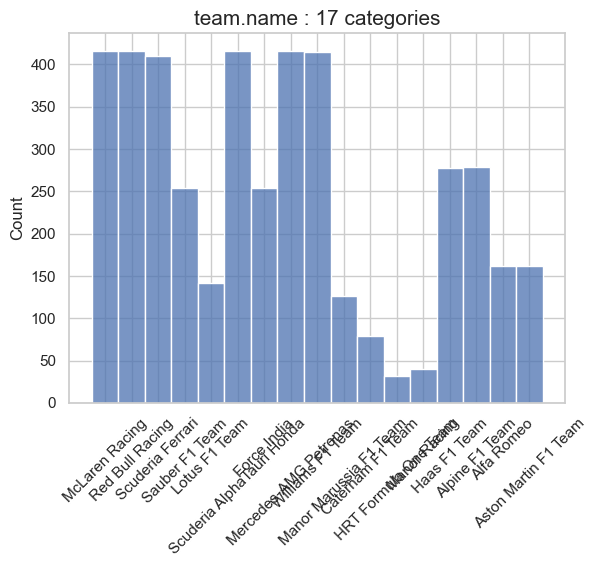

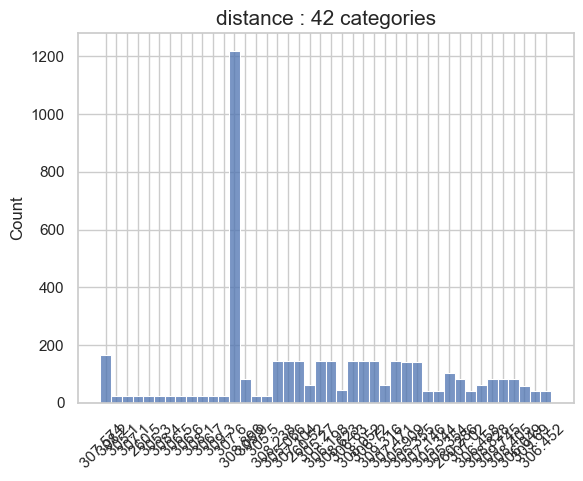

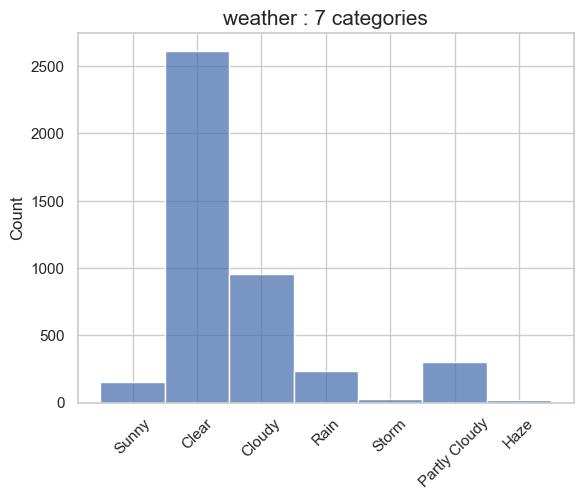

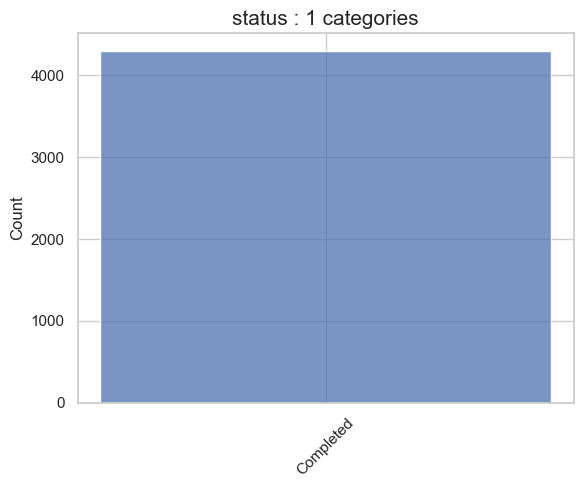

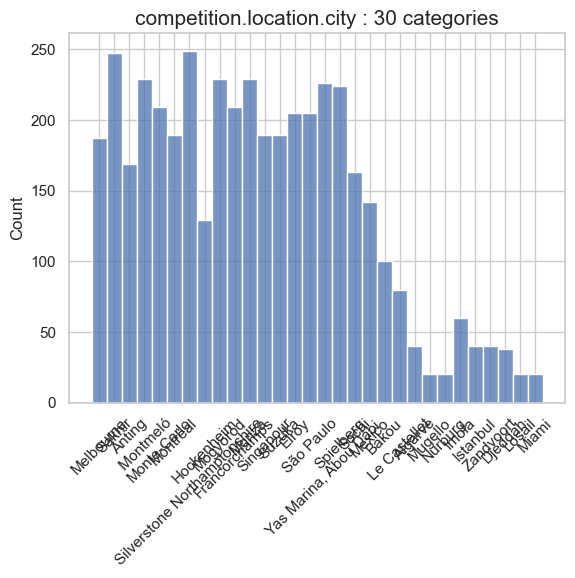

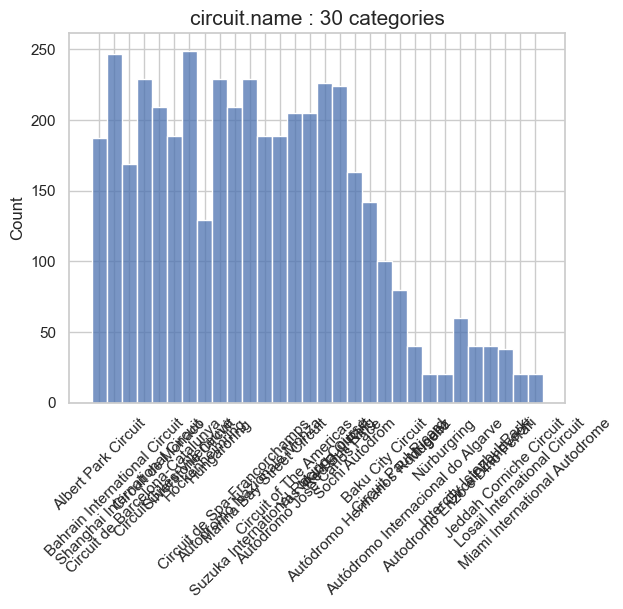

In [69]:
def plot_dist(df: pd.DataFrame):
    for column in df.columns:
        title = f"{column} : {len(df[column].unique())} categories" # this is the title display of the plot
        sns.histplot(df[column])
        plt.xticks(rotation= 45)
        plt.xlabel(None)
        plt.title(title , fontsize =15)
        plt.show()

plot_dist(categorical)  

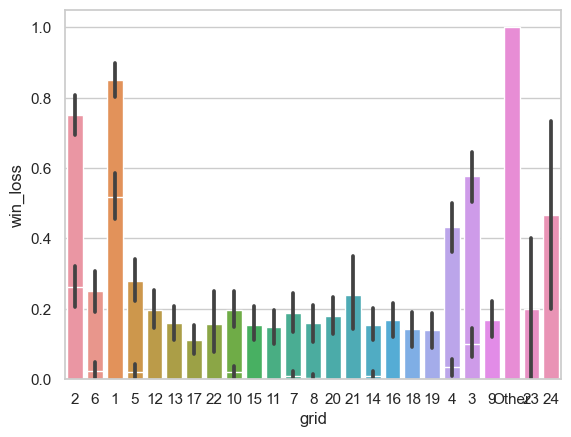

In [71]:
sns.barplot(x='grid', y='podium_position', data=result_df)
sns.barplot(x='grid', y='win_loss', data=result_df)

# Show the plot
plt.show()

In [ ]:
barplot = ['podium_position']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in numerical:
    sns.displot(result_df[i], kde = True)
    plt.show()

### Correlation Matrix

In [ ]:
corr_matrix=result_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()